In [5]:

import pandas as pd
import numpy as np
import pickle
import os
from sklearn.metrics.pairwise import rbf_kernel
import pandas as pd
import numpy as np

import time
from sklearn.metrics import accuracy_score, roc_auc_score
from collections import defaultdict
import matplotlib.pyplot as plt
import seaborn as sb
###
import pystan
from scipy.stats import pearsonr, zscore
from MFDFA import fgn
# Plot settings
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
sb.set()


import numpy as np

import matplotlib as mpl
from matplotlib import pyplot as plt
from matplotlib import cm

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import minmax_scale
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import PowerTransformer

from sklearn.datasets import fetch_california_housing


In [342]:
%matplotlib inline

In [6]:
import os
os.getcwd()

'/home/ak/Documents/Research/PaperCode'

In [7]:
import numpy as np

In [8]:
def tick_bars(df, price_column, m):
    '''
    compute tick bars

    # args
        df: pd.DataFrame()
        column: name for price data
        m: int(), threshold value for ticks
    # returns
        idx: list of indices
    '''
    t = df[price_column]
    ts = 0
    idx = []
    for i, x in enumerate(tqdm(t)):
        ts += 1
        if ts >= m:
            idx.append(i)
            ts = 0
            continue
    return idx

def tick_bar_df(df, price_column, m):
    idx = tick_bars(df, price_column, m)
    return df.iloc[idx].drop_duplicates()

def tick_bars(df, price_column, m):
    '''
    compute tick bars

    # args
        df: pd.DataFrame()
        column: name for price data
        m: int(), threshold value for ticks
    # returns
        idx: list of indices
    '''
    t = df[price_column]
    ts = 0
    idx = []
    for i, x in enumerate(tqdm(t)):
        ts += 1
        if ts >= m:
            idx.append(i)
            ts = 0
            continue
    return idx

def tick_bar_df(df, price_column, m):
    idx = tick_bars(df, price_column, m)
    return df.iloc[idx].drop_duplicates()
def tick_bars(df, price_column, m):
    '''
    compute tick bars

    # args
        df: pd.DataFrame()
        column: name for price data
        m: int(), threshold value for ticks
    # returns
        idx: list of indices
    '''
    t = df[price_column]
    ts = 0
    idx = []
    for i, x in enumerate(tqdm(t)):
        ts += 1
        if ts >= m:
            idx.append(i)
            ts = 0
            continue
    return idx

def tick_bar_df(df, price_column, m):
    idx = tick_bars(df, price_column, m)
    return df.iloc[idx].drop_duplicates()

In [9]:
# import visual tools
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
%matplotlib inline
import seaborn as sns

plt.style.use('seaborn-talk')
plt.style.use('bmh')

#plt.rcParams['font.family'] = 'DejaVu Sans Mono'
#plt.rcParams['font.size'] = 9.5
plt.rcParams['font.weight'] = 'medium'
#plt.rcParams['figure.figsize'] = 10,7
blue, green, red, purple, gold, teal = sns.color_palette('colorblind', 6)

# import util libs

from tqdm import tqdm, tqdm_notebook
import warnings
warnings.filterwarnings("ignore")

RANDOM_STATE = 777



In [10]:
def create_axes(title, figsize=(16, 6)):
    fig = plt.figure(figsize=figsize)
    fig.suptitle(title)

    # define the axis for the first plot
    left, width = 0.1, 0.22
    bottom, height = 0.1, 0.7
    bottom_h = height + 0.15
    left_h = left + width + 0.02

    rect_scatter = [left, bottom, width, height]
    rect_histx = [left, bottom_h, width, 0.1]
    rect_histy = [left_h, bottom, 0.05, height]

    ax_scatter = plt.axes(rect_scatter)
    ax_histx = plt.axes(rect_histx)
    ax_histy = plt.axes(rect_histy)

    # define the axis for the zoomed-in plot
    left = width + left + 0.2
    left_h = left + width + 0.02

    rect_scatter = [left, bottom, width, height]
    rect_histx = [left, bottom_h, width, 0.1]
    rect_histy = [left_h, bottom, 0.05, height]

    ax_scatter_zoom = plt.axes(rect_scatter)
    ax_histx_zoom = plt.axes(rect_histx)
    ax_histy_zoom = plt.axes(rect_histy)

    # define the axis for the colorbar
    left, width = width + left + 0.13, 0.01

    rect_colorbar = [left, bottom, width, height]
    ax_colorbar = plt.axes(rect_colorbar)

    return ((ax_scatter, ax_histy, ax_histx),
            (ax_scatter_zoom, ax_histy_zoom, ax_histx_zoom),
            ax_colorbar)


def plot_distribution(axes, X, y, hist_nbins=50, title="",
                      x0_label="", x1_label=""):
    ax, hist_X1, hist_X0 = axes

    ax.set_title(title)
    ax.set_xlabel(x0_label)
    ax.set_ylabel(x1_label)

    # The scatter plot
    colors = cmap(y)
    ax.scatter(X[:, 0], X[:, 1], alpha=0.5, marker='o', s=5, lw=0, c=colors)

    # Removing the top and the right spine for aesthetics
    # make nice axis layout
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()
    ax.spines['left'].set_position(('outward', 10))
    ax.spines['bottom'].set_position(('outward', 10))

    # Histogram for axis X1 (feature 5)
    hist_X1.set_ylim(ax.get_ylim())
    hist_X1.hist(X[:, 1], bins=hist_nbins, orientation='horizontal',
                 color='grey', ec='grey')
    hist_X1.axis('off')

    # Histogram for axis X0 (feature 0)
    hist_X0.set_xlim(ax.get_xlim())
    hist_X0.hist(X[:, 0], bins=hist_nbins, orientation='vertical',
                 color='grey', ec='grey')
    hist_X0.axis('off')
    

In [11]:
def make_plot(item_idx):
    title, X = distributions[item_idx]
    ax_zoom_out, ax_zoom_in, ax_colorbar = create_axes(title)
    axarr = (ax_zoom_out, ax_zoom_in)
    plot_distribution(axarr[0], X, y, hist_nbins=200,
                      x0_label="Median Income",
                      x1_label="Number of households",
                      title="Full data")

    # zoom-in
    zoom_in_percentile_range = (0, 99)
    cutoffs_X0 = np.percentile(X[:, 0], zoom_in_percentile_range)
    cutoffs_X1 = np.percentile(X[:, 1], zoom_in_percentile_range)

    non_outliers_mask = (
        np.all(X > [cutoffs_X0[0], cutoffs_X1[0]], axis=1) &
        np.all(X < [cutoffs_X0[1], cutoffs_X1[1]], axis=1))
    plot_distribution(axarr[1], X[non_outliers_mask], y[non_outliers_mask],
                      hist_nbins=50,
                      x0_label="Median Income",
                      x1_label="Number of households",
                      title="Zoom-in")

    norm = mpl.colors.Normalize(y_full.min(), y_full.max())
    mpl.colorbar.ColorbarBase(ax_colorbar, cmap=cmap,
                              norm=norm, orientation='vertical',
                              label='Color mapping for values of y')

In [85]:

def mad_outlier(y, thresh=5.):
    '''
    compute outliers based on mad
    # args
        y: assumed to be array with shape (N,1)
        thresh: float()
    # returns
        array index of outliers
    '''
    median = np.median(y)
    diff = np.sum((y - median)**2, axis=-1)
    diff = np.sqrt(diff)
    med_abs_deviation = np.median(diff)

    modified_z_score = 0.6745 * diff / med_abs_deviation

    return modified_z_score > thresh

In [13]:

def select_sample_data(ref, sub, price_col, date):
    '''
    select a sample of data based on date, assumes datetimeindex
    
    # args
        ref: pd.DataFrame containing all ticks
        sub: subordinated pd.DataFrame of prices
        price_col: str(), price column
        date: str(), date to select
    # returns
        xdf: ref pd.Series
        xtdf: subordinated pd.Series
    '''
    xdf = ref[price_col].loc[ref[str(date)]
    xtdf = sub[price_col].loc[date]
    return xdf, xtdf

In [14]:
from stylised_facts.stylised_facts_data_utilities import createLOB

In [15]:
os.getcwd()
''' Locations'''
cwd= os.getcwd()
extHD = '/media/ak/My Passport/'
extHdData = "".join((extHD, 'Data'))
extHdExpData = "".join((extHD, 'Experiment Data')) #['features', 'labels', 'metrics', 'models']
extHdFutures = "".join((extHD, 'Barket Data/raw bloomberg data')) #futures
futuresSymbols  = []

In [42]:
os.listdir(extHdExpData)
cleanLOBFolder = "/".join((extHdExpData,'CleanLOBData'))
symbols =sorted(os.listdir(cleanLOBFolder))

In [46]:
symbolIdx = 0
symbolCleanSymbolFolder = "/".join((cleanLOBFolder, symbols[symbolIdx]))
symbolCleanFilesList = os.listdir(symbolCleanSymbolFolder)

In [52]:
dfTest =pd.read_csv("/".join((symbolCleanSymbolFolder,symbolCleanFilesList[0])))

In [54]:
dfTest.columns.values

array(['Unnamed: 0', 'BidQuoteId', 'BidSize', 'QuoteTime', 'type_x',
       'BestBid', 'TradeTime', 'AskQuoteId', 'AskSize', 'time_y',
       'type_y', 'BestAsk', 'TradeId', 'TradeSize', 'TradedTime', 'type',
       'TradePrice', 'TradeId.1', 'TimeStamp', 'milliSeconds', 'Duration',
       'PriceChange', 'LogReturn', 'BidOffer', 'MicroPrice',
       'MicroPricePctChange', 'FwdMPChange_1', 'FwdMPChange_5',
       'LogTradeSize'], dtype=object)

In [180]:
dfTestCopy = dfTest.copy(deep=True)

In [181]:
dfGrouped = dfTestCopy.groupby('TradeTime')['BidSize', 'AskSize', 'TradeSize']
dfGroupedSum = dfGrouped.sum()

In [182]:
dfMergedtEST =dfTestCopy.merge(dfGroupedSum, on='TradeTime')

In [183]:
dfTestCase = dfMergedtEST.drop(columns=['Unnamed: 0','type_x','type_y','AskQuoteId','BidQuoteId'])

In [184]:
os.listdir(extHdFutures)
bmrg_folders=[s for s in os.listdir(extHdFutures) if ('Comdty') in s]
# bmrg_trades=sorted([s for s in os.listdir(dataOnlyDrive) if s.endswith('y_trades')])
# bmrg_quotes=sorted([s for s in os.listdir(dataOnlyDrive) if s.endswith('y_quotes')])
# bmrg_tickers=sorted([bmrg_trades[idx].split('_t')[0] for idx,_ in enumerate(bmrg_trades)])

In [185]:
test=createLOB.rawLOBFIle(futuresFolder=extHdFutures, symbolsFolder=bmrg_folders, symbolID=1,fileID=5)
test.shape

(1178, 5)

In [187]:
# symbolID=1
# futuresFolder= extHdFutures
# symbolsFolder=bmrg_folders
# listDatesFiles = os.listdir("/".join((futuresFolder, symbolsFolder[symbolID])))
# symbol=symbolsFolder[symbolID].split("_")[0]

In [179]:
# for symbolIDX, _ in enumerate(symbolsFolder):
#     noFiles = len(os.listdir())
#     print(symbolsFolder[symbolIDX], symbolIDX)
    

In [178]:

# testLOB =(createLOB.createLOB(rawLOBFile = test))
# cleanLOB =createLOB.formatLOB(testLOB)
# cleanLOBDate = str(pd.to_datetime(cleanLOB.QuoteTime[0]).date())

In [188]:
testLOB= dfTestCopy


In [189]:
# testLOB[testLOB['TradeId']!=0]
testLOB.columns.values

array(['Unnamed: 0', 'BidQuoteId', 'BidSize', 'QuoteTime', 'type_x',
       'BestBid', 'TradeTime', 'AskQuoteId', 'AskSize', 'time_y',
       'type_y', 'BestAsk', 'TradeId', 'TradeSize', 'TradedTime', 'type',
       'TradePrice', 'TradeId.1', 'TimeStamp', 'milliSeconds', 'Duration',
       'PriceChange', 'LogReturn', 'BidOffer', 'MicroPrice',
       'MicroPricePctChange', 'FwdMPChange_1', 'FwdMPChange_5',
       'LogTradeSize'], dtype=object)

In [76]:
# cleanLOBDateFileName = "_".join(('LOB',str(symbol),cleanLOBDate+".csv"))

In [77]:
# cleanLOBDateFileName
# cleanLOBFileLoc = "/".join((cleanLOBFolder,symbol ,cleanLOBDateFileName))

In [78]:
# cleanLOB.to_csv(cleanLOBFileLoc)

In [79]:
# cleanLOB.columns.values

In [27]:
# cleanLOB['TimeStamp']=pd.to_datetime(cleanLOB.TradeTime).dt.time
# cleanLOB['milliSeconds'] = [(((x.hour * 60 + x.minute) * 60 + x.second) * 1000) for x in cleanLOB['TimeStamp']]

In [190]:
mad = mad_outlier(testLOB.MicroPrice.values.reshape(-1,1))

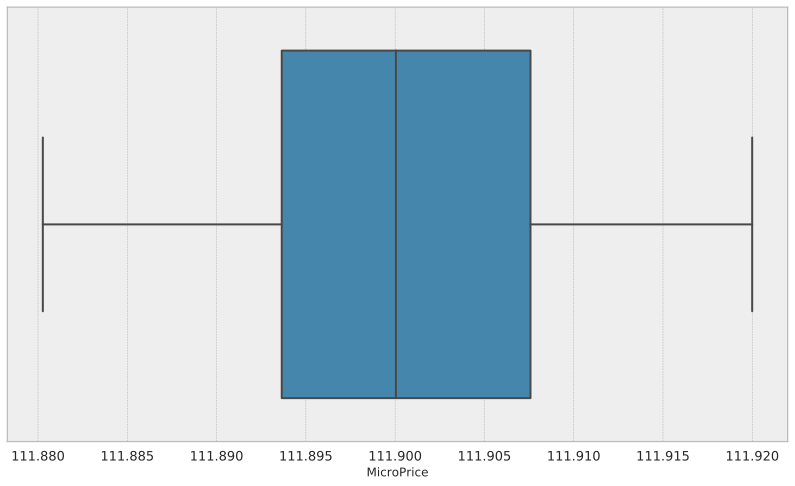

In [191]:
_=sns.boxplot(testLOB.loc[~mad].MicroPrice)

In [93]:
# listDatesFiles = ("/".join((futuresFolder, symbolsFolder[symbolID])))
# rawLOBFile = pd.read_csv("/".join((futuresFolder, symbolsFolder[symbolID], listDatesFiles[symbolID])))

In [192]:
dfLOB =testLOB.loc[~mad]

In [193]:
dfLOB.columns.values

array(['Unnamed: 0', 'BidQuoteId', 'BidSize', 'QuoteTime', 'type_x',
       'BestBid', 'TradeTime', 'AskQuoteId', 'AskSize', 'time_y',
       'type_y', 'BestAsk', 'TradeId', 'TradeSize', 'TradedTime', 'type',
       'TradePrice', 'TradeId.1', 'TimeStamp', 'milliSeconds', 'Duration',
       'PriceChange', 'LogReturn', 'BidOffer', 'MicroPrice',
       'MicroPricePctChange', 'FwdMPChange_1', 'FwdMPChange_5',
       'LogTradeSize'], dtype=object)

In [194]:
dfLOB['TradedDollarVolume'] =dfLOB.TradeSize*dfLOB.TradePrice
cleanLOB['TradedDollarVolume'] =cleanLOB.TradeSize*dfLOB.TradePrice

## Tick Bars ##

In [195]:
n_ticks = dfLOB.shape[0]
volume_ratio = (dfLOB.TradeSize.sum()/n_ticks).round()
dollar_ratio = (dfLOB.TradedDollarVolume.sum()/n_ticks).round()
print(f'num ticks: {n_ticks:,}')
print(f'volume ratio: {volume_ratio}')
print(f'dollar ratio: {dollar_ratio}')

num ticks: 22,187
volume ratio: 84.0
dollar ratio: 9374.0


In [196]:
tick_M = 5 # arbitrary
print(f'tick threshold: {tick_M:,}')
tidx = tick_bars(dfLOB, 'TradePrice', tick_M)
tidx[:10]

100%|██████████| 22187/22187 [00:00<00:00, 3130138.68it/s]

tick threshold: 5


[4, 9, 14, 19, 24, 29, 34, 39, 44, 49]

In [197]:
tick_df = tick_bar_df(dfLOB, 'TradePrice', tick_M)
tick_df.shape

100%|██████████| 22187/22187 [00:00<00:00, 2521856.40it/s]


(4437, 30)

In [104]:
from MFDFA import MFDFA

In [198]:
t_final= tick_df.shape[0]
delta_t=1 #tick

In [199]:
# The time array of the trajectory
time = np.arange(0, t_final, delta_t)
y = np.asarray(tick_df.MicroPricePctChange)

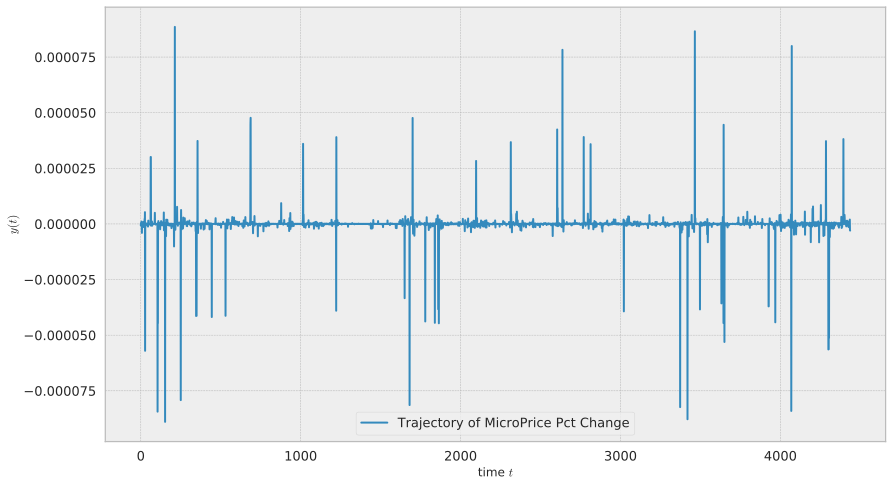

In [200]:
#This is the stochastic trajectory over time
plt.plot(time, y, label = r'Trajectory of MicroPrice Pct Change')

plt.xlabel(r'time $t$')
plt.ylabel(r'$y(t)$')
plt.legend()

In [201]:
# Select a band of lags, which usually ranges from 
# very small segments of data, to very long ones, as
lag = np.logspace(0.7, 4, 60).astype(int)
# Notice these must be ints, since these will segment
# the data into chucks of lag size

# Select the power q
q = 9

# The order of the polynomial fitting
order = 2

# Obtain the (MF)DFA as
lag, dfa = MFDFA(y, lag = lag, q = q, order = order)

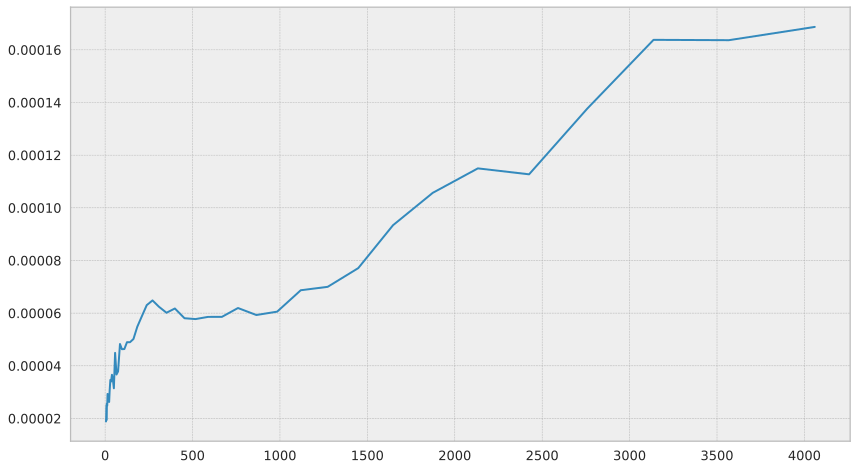

In [202]:
plt.plot(lag, dfa)

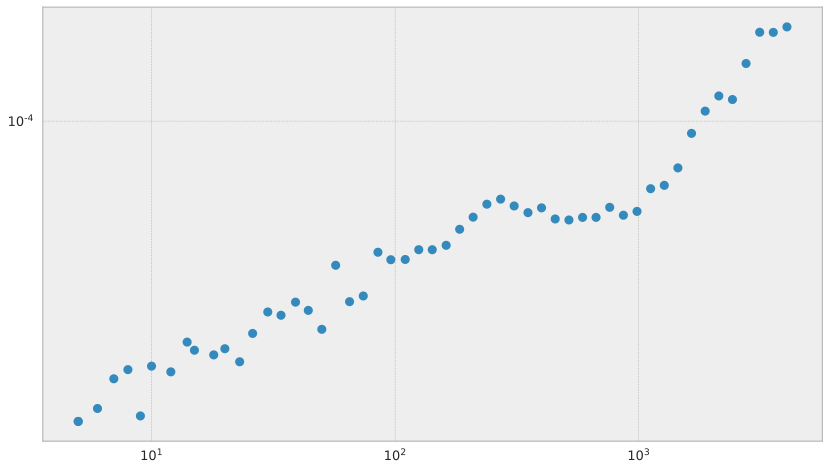

In [203]:
# To uncover the Hurst index, lets get some log-log plots
plt.loglog(lag, dfa, 'o', label='fOU: MFDFA q=2')

# And now we need to fit the line to find the slope. We will
# fit the first points, since the results are more accurate 
# there. Don't forget that if you are seeing in log-log
# scales, you need to fit the logs of the results
np.polyfit(np.log(lag[:15]), np.log(dfa[:15]),1)[0]
plt.show()
# Now what you should obtain is: slope = H + 1

In [111]:
# Lets take three examples, with H=0.3, H=0.5, H=0.7
# The total integration time, as before
t_final = 500

# The desired timestep of integration
delta_t = 0.001

# time array of the process
time = np.linspace(0, t_final, t_final * int(1 / delta_t))

# Generate three fractional Gaussian noises dB 
H_anti = 0.3       # Anti-presistent noise
H_regu = 0.5       # Regular noise
H_posi = 0.7       # Positively correlated noise

# Generate the noises (with the appropriate normalisation)
dB_anti = (t_final ** H_anti) * fgn(N = time.size, H = H_anti)
dB_regu = (t_final ** H_regu) * fgn(N = time.size, H = H_regu)
dB_posi = (t_final ** H_posi) * fgn(N = time.size, H = H_posi)

In [126]:
# # Let's plot the noises, and the associated motions

# fig, ax = plt.subplots(2,3, figsize=(12,4));

# ax[0,0].plot(time, dB_anti)
# ax[0,1].plot(time, dB_regu)
# ax[0,2].plot(time, dB_posi)

# # their motions are given by the integral of the noise,
# # i.e., the cumsum of the processew 

# ax[1,0].plot(time, np.cumsum(dB_anti))
# ax[1,1].plot(time, np.cumsum(dB_regu))
# ax[1,2].plot(time, np.cumsum(dB_posi))

In [204]:
import os
def require(fname):
    if not os.path.exists(fname):
        from urllib import urlretrieve
        print ('Downloading %s.')%fname
        urlretrieve('http://bsp.brain.riken.jp/~juricap/mdfa/%s'%fname,fname)
    if fname.endswith('.zip'):
        import zipfile
        try:
            zipfile.ZipFile(fname).extractall()
        except Exception as exc:
            print( exc)


plt.rcParams['figure.figsize'] = (14,8)
from scipy.io import loadmat
from numpy import cumsum, polyfit, polyval, mean, sqrt
import matplotlib.pyplot as plt 
SAVE = False

In [205]:
RW1=np.cumsum(y-np.mean(y));
A = 10.0

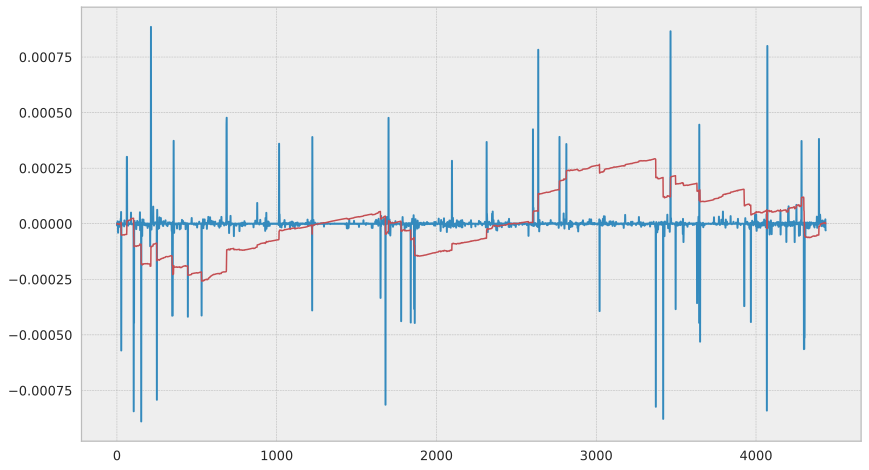

In [206]:
plt.plot(A*y)
plt.plot(RW1,'r',lw=1.5)

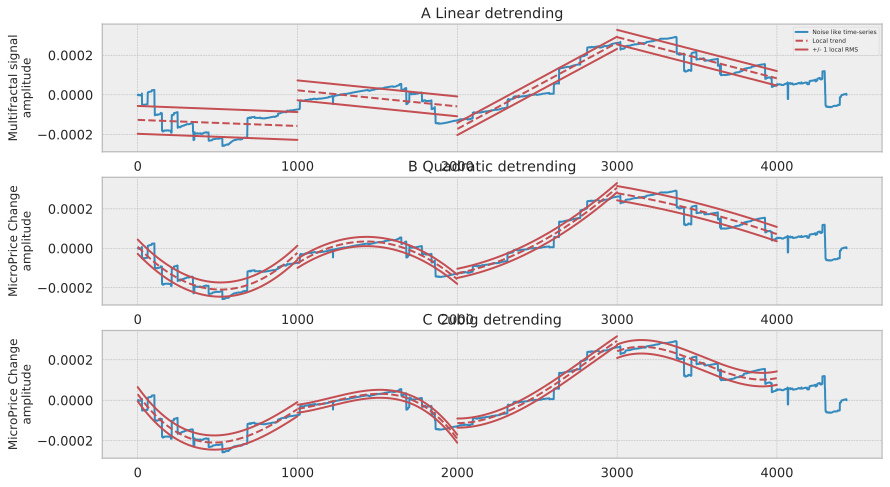

In [219]:
from numpy import cumsum
def plot_trends(X,scale,m=1,label='',title=''):
    t = np.arange(X.shape[0])
    plt.plot(t,X,lw=2.0)
    for i0 in range(0,X.shape[0]-scale+1,scale):
        i1 = i0+scale
        t0 = t[i0:i1]
        C = polyfit(t0,X[i0:i1],m)
        fit = polyval(C,t0);
        RMS = np.sqrt(((X[i0:i1]-fit)**2).mean())
        plt.plot(t0,fit,color='r',linestyle='--')
        plt.plot(t0,fit-RMS,'r')
        plt.plot(t0,fit+RMS,'r')
    plt.ylabel(label,ha='center')
#     if title: plt.text(100,500,title,fontsize=12) 

scale = 1000
RW = cumsum(y-y.mean())

plt.subplot(311)
plt.title('A Linear detrending')
plot_trends(RW1,scale,1,label='Multifractal signal\namplitude',
            title='A Linear detrending')
plt.legend(['Noise like time-series','Local trend','+/- 1 local RMS'], prop={'size': 6}, loc='upper right')
plt.subplot(312)
plt.title('B Quadratic detrending')
plot_trends(RW1,scale,2,label='MicroPrice Change\namplitude',
            title='B Quadratic detrending')
plt.subplot(313)
plt.title('C Cubig detrending')
plot_trends(RW1,scale,3,label='MicroPrice Change\namplitude',
            title='C Cubic detrending')

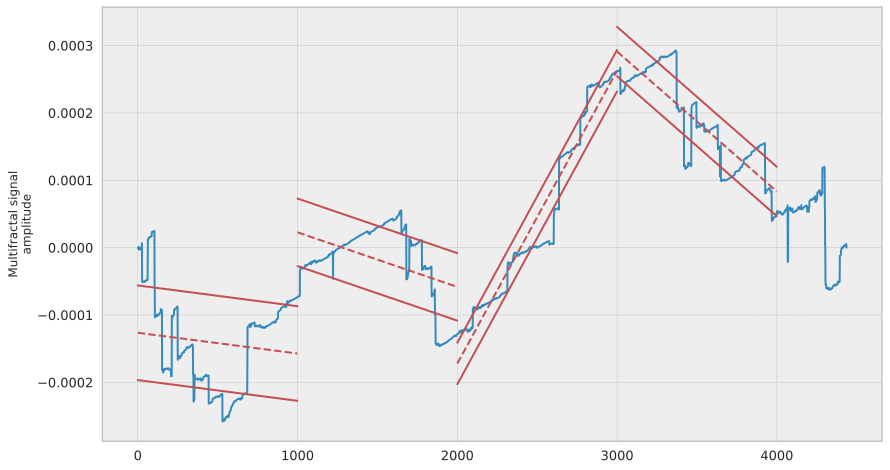

In [222]:
plot_trends(RW1,scale,1,label='Multifractal signal\namplitude',
            title='A Linear detrending')

In [223]:
def trends(X,scale,m=1):
    t = np.arange(X.shape[0])
    segments = np.arange(0,X.shape[0]-scale+1,scale)
    RMS = []
    for i0 in segments:
        i1 = i0+scale
        t0 = t[i0:i1]
        C = polyfit(t0,X[i0:i1],m)
        fit = polyval(C,t0)
        RMS.append( sqrt(((X[i0:i1]-fit)**2).mean()) )
    return np.array(RMS)

RW = cumsum(y-y.mean())
scales = 2**np.arange(4,11)
#[16,32,64,128,256,512,1024];
m = 1



In [224]:
import time

In [225]:
from stylised_facts.stylised_facts_data_utilities import mdfda as mdfda

In [226]:
X =np.arange(9000)
# mdfda.rw(X,4,3)
type(y)

numpy.ndarray

In [227]:
scstep = 8
t0 = time.clock()
scales = np.floor(2.0**np.arange(4,10.1,1.0/scstep)).astype('i4')
RW = mdfda.rwalk(y.ravel())

RMS = mdfda.compRMS(RW,scales,1)
dtslow = time.clock() - t0
print ('Took %0.3fs'%dtslow)

Took 1.444s


In [228]:
# qstep = 4
# qs = np.arange(-5,5.01,1.0/qstep)
# Fq = mdfda.compFq(RMS,qs)

# plt.subplot(121)
# plt.plot(scales[::scstep//2],Fq[::scstep//2,::qstep],'.-',lw=0.1)
# plt.gca().set_xscale('log')
# gca().set_yscale('log')
# Hq = zeros(len(qs),'f8')
# for qi,q in enumerate(qs):
#     C = polyfit(log2(scales),log2(Fq[:,qi]),1)
#     Hq[qi] = C[0]
#     if abs(q - int(q)) > 0.1: continue
#     loglog(scales,2**polyval(C,log2(scales)),lw=0.5,label='q=%d [H=%0.2f]'%(q,Hq[qi]))
# margins(0,0)
# legend(loc='lower right')
# plt.xticks(scales[::scstep],scales[::scstep]);
# plt.yticks([0.1,1.0,10.0],[0.1,1.0,10.0])
# plt.xlabel('scale')
# plt.ylabel('Fq')

# plt.subplot(122)
# tq = Hq*qs - 1
# hq = diff(tq)/(qs[1]-qs[0])
# Dq = (qs[:-1]*hq) - tq[:-1]
# plot(hq,Dq,'.-')
# xlabel('hq'); ylabel('Dq')

### Volume Clock ###

In [229]:
def volume_bars(df, volume_column, m):
    '''
    compute volume bars

    # args
        df: pd.DataFrame()
        volume_column: name for volume data
        m: int(), threshold value for volume
    # returns
        idx: list of indices
    '''
    t = df[volume_column]
    ts = 0
    idx = []
    for i, x in enumerate(tqdm(t)):
        ts += x
        if ts >= m:
            idx.append(i)
            ts = 0
            continue
    return idx

def volume_bar_df(df, volume_column, m):
    idx = volume_bars(df, volume_column, m)
    return df.iloc[idx].drop_duplicates()

In [230]:
dfLOB.columns.values

array(['Unnamed: 0', 'BidQuoteId', 'BidSize', 'QuoteTime', 'type_x',
       'BestBid', 'TradeTime', 'AskQuoteId', 'AskSize', 'time_y',
       'type_y', 'BestAsk', 'TradeId', 'TradeSize', 'TradedTime', 'type',
       'TradePrice', 'TradeId.1', 'TimeStamp', 'milliSeconds', 'Duration',
       'PriceChange', 'LogReturn', 'BidOffer', 'MicroPrice',
       'MicroPricePctChange', 'FwdMPChange_1', 'FwdMPChange_5',
       'LogTradeSize', 'TradedDollarVolume'], dtype=object)

In [231]:
volume_M =5 

In [232]:
print(f'volume threshold: {volume_M:,}')
v_bar_df = volume_bar_df(dfLOB, 'TradeSize', volume_M)


100%|██████████| 22187/22187 [00:00<00:00, 2710246.47it/s]

volume threshold: 5


In [233]:
import cprint
from cprint import *

In [234]:
dfLOB.MicroPrice.loc[3]

111.9174945375091

In [246]:
dfLOB.columns.values

array(['Unnamed: 0', 'BidQuoteId', 'BidSize', 'QuoteTime', 'type_x',
       'BestBid', 'TradeTime', 'AskQuoteId', 'AskSize', 'time_y',
       'type_y', 'BestAsk', 'TradeId', 'TradeSize', 'TradedTime', 'type',
       'TradePrice', 'TradeId.1', 'TimeStamp', 'milliSeconds', 'Duration',
       'PriceChange', 'LogReturn', 'BidOffer', 'MicroPrice',
       'MicroPricePctChange', 'FwdMPChange_1', 'FwdMPChange_5',
       'LogTradeSize', 'TradedDollarVolume'], dtype=object)

In [155]:
dfLOB.TradedTime.values

array(['2018-04-16 06:01:02.417', '2018-04-16 06:01:02.417',
       '2018-04-16 06:01:02.417', ..., '2018-04-16 19:59:58.799',
       '2018-04-16 19:59:58.799', '2018-04-16 06:01:02.417'], dtype=object)

In [235]:
x= dfLOB.MicroPricePctChange.values

In [236]:
import powerlaw

In [238]:
fit =powerlaw.Fit(x)

Values less than or equal to 0 in data. Throwing out 0 or negative values
Calculating best minimal value for power law fit


In [240]:
print(fit.alpha)
print(fit.sigma)

1.862734947488672
0.015761824450851277


Values less than or equal to 0 in data. Throwing out 0 or negative values
Calculating best minimal value for power law fit
'nan' in fit cumulative distribution values.
Likely underflow or overflow error: the optimal fit for this distribution gives values that are so extreme that we lack the numerical precision to calculate them.
'nan' in fit cumulative distribution values.
Likely underflow or overflow error: the optimal fit for this distribution gives values that are so extreme that we lack the numerical precision to calculate them.
'nan' in fit cumulative distribution values.
Likely underflow or overflow error: the optimal fit for this distribution gives values that are so extreme that we lack the numerical precision to calculate them.
'nan' in fit cumulative distribution values.
Likely underflow or overflow error: the optimal fit for this distribution gives values that are so extreme that we lack the numerical precision to calculate them.
'nan' in fit cumulative distribution values.


'nan' in fit cumulative distribution values.
Likely underflow or overflow error: the optimal fit for this distribution gives values that are so extreme that we lack the numerical precision to calculate them.
'nan' in fit cumulative distribution values.
Likely underflow or overflow error: the optimal fit for this distribution gives values that are so extreme that we lack the numerical precision to calculate them.
'nan' in fit cumulative distribution values.
Likely underflow or overflow error: the optimal fit for this distribution gives values that are so extreme that we lack the numerical precision to calculate them.
'nan' in fit cumulative distribution values.
Likely underflow or overflow error: the optimal fit for this distribution gives values that are so extreme that we lack the numerical precision to calculate them.
'nan' in fit cumulative distribution values.
Likely underflow or overflow error: the optimal fit for this distribution gives values that are so extreme that we lack the

'nan' in fit cumulative distribution values.
Likely underflow or overflow error: the optimal fit for this distribution gives values that are so extreme that we lack the numerical precision to calculate them.
'nan' in fit cumulative distribution values.
Likely underflow or overflow error: the optimal fit for this distribution gives values that are so extreme that we lack the numerical precision to calculate them.
'nan' in fit cumulative distribution values.
Likely underflow or overflow error: the optimal fit for this distribution gives values that are so extreme that we lack the numerical precision to calculate them.
'nan' in fit cumulative distribution values.
Likely underflow or overflow error: the optimal fit for this distribution gives values that are so extreme that we lack the numerical precision to calculate them.
'nan' in fit cumulative distribution values.
Likely underflow or overflow error: the optimal fit for this distribution gives values that are so extreme that we lack the

'nan' in fit cumulative distribution values.
Likely underflow or overflow error: the optimal fit for this distribution gives values that are so extreme that we lack the numerical precision to calculate them.
'nan' in fit cumulative distribution values.
Likely underflow or overflow error: the optimal fit for this distribution gives values that are so extreme that we lack the numerical precision to calculate them.
'nan' in fit cumulative distribution values.
Likely underflow or overflow error: the optimal fit for this distribution gives values that are so extreme that we lack the numerical precision to calculate them.
'nan' in fit cumulative distribution values.
Likely underflow or overflow error: the optimal fit for this distribution gives values that are so extreme that we lack the numerical precision to calculate them.
'nan' in fit cumulative distribution values.
Likely underflow or overflow error: the optimal fit for this distribution gives values that are so extreme that we lack the

'nan' in fit cumulative distribution values.
Likely underflow or overflow error: the optimal fit for this distribution gives values that are so extreme that we lack the numerical precision to calculate them.
'nan' in fit cumulative distribution values.
Likely underflow or overflow error: the optimal fit for this distribution gives values that are so extreme that we lack the numerical precision to calculate them.
'nan' in fit cumulative distribution values.
Likely underflow or overflow error: the optimal fit for this distribution gives values that are so extreme that we lack the numerical precision to calculate them.
'nan' in fit cumulative distribution values.
Likely underflow or overflow error: the optimal fit for this distribution gives values that are so extreme that we lack the numerical precision to calculate them.
'nan' in fit cumulative distribution values.
Likely underflow or overflow error: the optimal fit for this distribution gives values that are so extreme that we lack the

'nan' in fit cumulative distribution values.
Likely underflow or overflow error: the optimal fit for this distribution gives values that are so extreme that we lack the numerical precision to calculate them.
'nan' in fit cumulative distribution values.
Likely underflow or overflow error: the optimal fit for this distribution gives values that are so extreme that we lack the numerical precision to calculate them.
'nan' in fit cumulative distribution values.
Likely underflow or overflow error: the optimal fit for this distribution gives values that are so extreme that we lack the numerical precision to calculate them.
'nan' in fit cumulative distribution values.
Likely underflow or overflow error: the optimal fit for this distribution gives values that are so extreme that we lack the numerical precision to calculate them.
'nan' in fit cumulative distribution values.
Likely underflow or overflow error: the optimal fit for this distribution gives values that are so extreme that we lack the

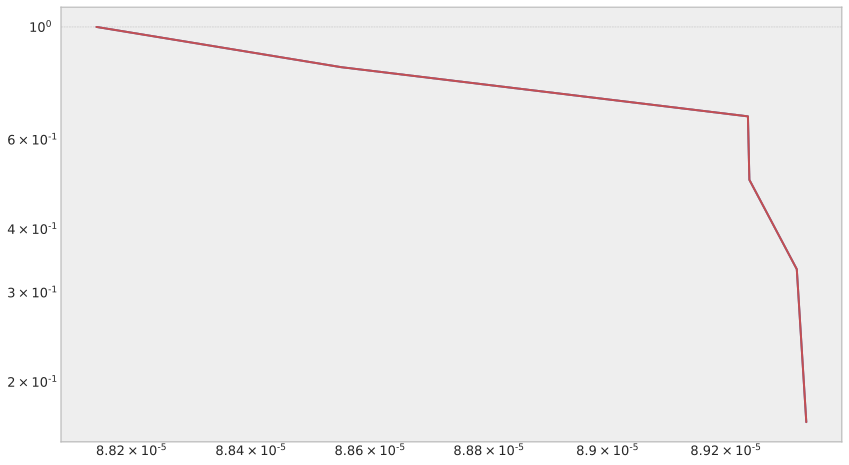

In [243]:
data= x
fit = powerlaw.Fit(data, discrete=True, xmax=None)
FigCCDFmax = fit.plot_ccdf(color='b', label=r"Empirical, no $x_{max}$")
fit.power_law.plot_ccdf(color='b', linestyle='--', ax=FigCCDFmax, label=r"Fit, no $x_{max}$")
fit = powerlaw.Fit(data, discrete=True, xmax=1000)
fit.plot_ccdf(color='r', label=r"Empirical, $x_{max}=1000$")
fit.power_law.plot_ccdf(color='r', linestyle='--', ax=FigCCDFmax, label=r"Fit, $x_{max}=1000$")


In [247]:
# fit = powerlaw.Fit(data, discrete=True)
# ####
# fit.distribution_compare('power_law', 'lognormal')
# fig = fit.plot_ccdf(linewidth=3, label='Empirical Data')
# fit.power_law.plot_ccdf(ax=fig, color='r', linestyle='--', label='Power law fit')
# fit.lognormal.plot_ccdf(ax=fig, color='g', linestyle='--', label='Lognormal fit')
# ####
# fig.set_ylabel(u"p(X≥x)")
# fig.set_xlabel("Frequency")
# handles, labels = fig.get_legend_handles_labels()
# fig.legend(handles, labels, loc=3)

In [316]:
absMPchange = np.abs(v_bar_df.MicroPricePctChange).dropna()

In [317]:
x=(np.abs(v_bar_df.MicroPricePctChange)/v_bar_df.Duration).dropna()

In [318]:
v_bar_df

,Unnamed: 0,BidQuoteId,BidSize,QuoteTime,type_x,BestBid,TradeTime,AskQuoteId,AskSize,time_y,...,Duration,PriceChange,LogReturn,BidOffer,MicroPrice,MicroPricePctChange,FwdMPChange_1,FwdMPChange_5,LogTradeSize,TradedDollarVolume
0,0,1,757,2018-04-16 06:01:02.417,BID,111.915,2018-04-16 06:01:02.417,2,685,2018-04-16 06:01:02.417,...,NaN,NaN,NaN,0.005,111.917375,NaN,NaN,NaN,4.430817,9400.860
1,1,4,673,2018-04-16 06:01:02.417,BID,111.915,2018-04-16 06:01:02.417,2,685,2018-04-16 06:01:02.417,...,0.0,0.000000,0.000000,0.005,111.917522,1.312736e-06,NaN,NaN,4.430817,9400.860
2,2,5,674,2018-04-16 06:01:02.418,BID,111.915,2018-04-16 06:01:02.418,2,685,2018-04-16 06:01:02.417,...,1.0,0.000000,0.000000,0.005,111.917520,-1.658224e-08,1.312736e-06,NaN,4.430817,9400.860
3,3,6,688,2018-04-16 06:01:02.419,BID,111.915,2018-04-16 06:01:02.419,2,685,2018-04-16 06:01:02.417,...,1.0,0.000000,0.000000,0.005,111.917495,-2.296151e-07,-1.658224e-08,NaN,4.430817,9400.860
4,4,7,728,2018-04-16 06:01:02.419,BID,111.915,2018-04-16 06:01:02.419,2,685,2018-04-16 06:01:02.417,...,0.0,0.000000,0.000000,0.005,111.917424,-6.309717e-07,-2.296151e-07,NaN,4.430817,9400.860
5,5,10,736,2018-04-16 06:01:02.447,BID,111.915,2018-04-16 06:01:02.447,11,1089,2018-04-16 06:01:02.447,...,28.0,0.000000,0.000000,0.005,111.917984,5.000481e-06,-6.309717e-07,NaN,4.430817,9400.860
6,6,12,728,2018-04-16 06:01:02.451,BID,111.915,2018-04-16 06:01:02.451,11,1089,2018-04-16 06:01:02.447,...,4.0,0.000000,0.000000,0.005,111.917997,1.173735e-07,5.000481e-06,1.312736e-06,4.430817,9400.860
7,7,17,729,2018-04-16 06:01:02.530,BID,111.915,2018-04-16 06:01:02.530,16,1246,2018-04-16 06:01:02.477,...,79.0,0.000000,0.000000,0.005,111.918154,1.409358e-06,1.173735e-07,-1.658224e-08,4.430817,9400.860
8,8,19,700,2018-04-16 06:01:02.596,BID,111.915,2018-04-16 06:01:02.596,16,1246,2018-04-16 06:01:02.477,...,66.0,0.000000,0.000000,0.005,111.918201,4.200254e-07,1.409358e-06,-2.296151e-07,3.367296,3245.535
9,9,21,671,2018-04-16 06:01:02.597,BID,111.915,2018-04-16 06:01:02.597,16,1246,2018-04-16 06:01:02.477,...,1.0,0.000000,0.000000,0.005,111.918250,4.327334e-07,4.200254e-07,-6.309717e-07,3.367296,3245.535


In [319]:
x[~np.isfinite(x)] = 0

In [321]:
x = 1000000*x

In [329]:
x2=x.drop(x.idxmax())

In [347]:
activity =x[x<1]
activity.describe()

count    14585.000000
mean         0.016565
std          0.069537
min          0.000000
25%          0.000000
50%          0.000055
75%          0.001909
max          0.970253
dtype: float64

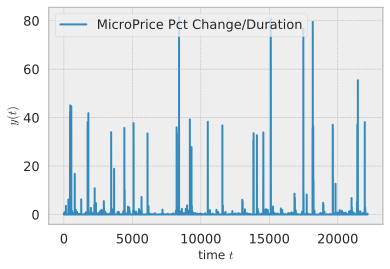

In [348]:
#This is the stochastic trajectory over time
plt.plot(x, label = r'MicroPrice Pct Change/Duration')

plt.xlabel(r'time $t$')
plt.ylabel(r'$y(t)$')
plt.legend()

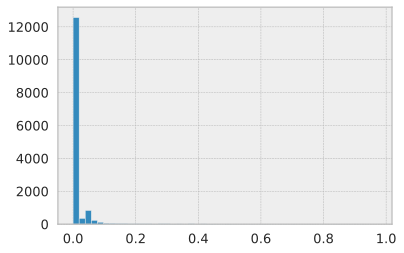

In [349]:
activity.hist(bins=50, label='activity')

In [360]:
ticks = np.sign(dfLOB.TradePrice -dfLOB.TradePrice.shift(1) )
ticks_adj = ticks.copy()

In [361]:
ticks_adj = ticks.replace(to_replace=0, method='ffill')

In [362]:
ticks_adj.tail(20)

22167   -1.0
22168   -1.0
22169   -1.0
22170   -1.0
22171   -1.0
22172   -1.0
22173    1.0
22174    1.0
22175    1.0
22176    1.0
22177    1.0
22178   -1.0
22179   -1.0
22180   -1.0
22181   -1.0
22182   -1.0
22183   -1.0
22184   -1.0
22185   -1.0
22186   -1.0
Name: TradePrice, dtype: float64

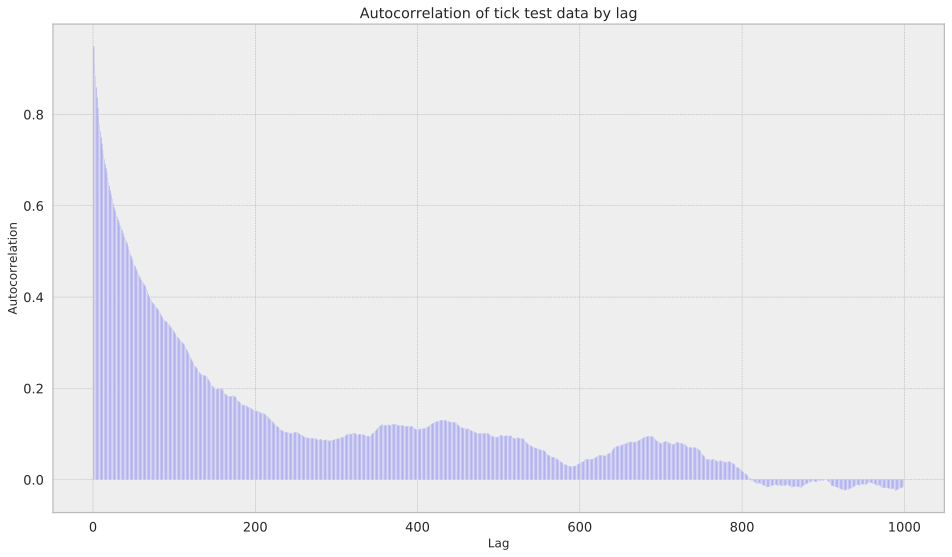

In [364]:
# Calculate autocorrelation for n lags 
fig, ax1 = plt.subplots(figsize=(16,9))
for i in np.arange( 1, 1000 ):
    ax1.bar( i, ticks_adj.autocorr( lag = i ), color = 'blue' )
ax1.set_title( 'Autocorrelation of tick test data by lag' )
ax1.set_ylabel( 'Autocorrelation' )
ax1.set_xlabel( 'Lag' )
plt.show()

In [365]:
# Calculate our signal: collect trades - we'll use tick count

# determine our window size
tick_window = 20

# Calc EMA directly (alpha = 2 / span +1)
ema = ticks_adj.ewm( span=tick_window ).mean()


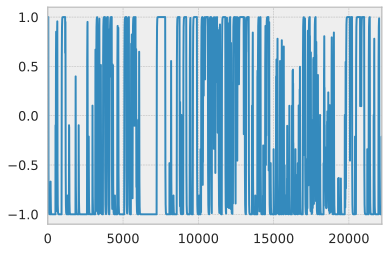

In [366]:
ema.plot()

TypeError: 'tuple' object is not callable

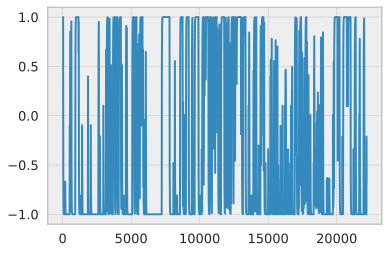

In [404]:
def plot_rms(x,label=''):
    xlim=(0,1)
    RMS = sqrt((x**2).sum())
    plt.plot(x)
    x0 = x.mean()
    x1 = x.std()
    plt.plot(xlim(),x0*r_[1,1],'r--')
    plt.plot(xlim(),(x0+x1)*r_[1,1],'r-',lw=1.25)
    plt.plot(xlim(),(x0-x1)*r_[1,1],'r-',lw=1.25)
    plt.ylabel(label,ha='center')
plot_rms(ema)

NameError: name 'xlim' is not defined

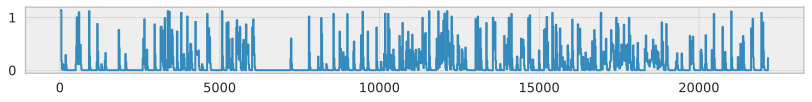

In [400]:
from numpy import r_
def trends(X,scale,m=1):
    t = np.arange(X.shape[0])
    segments = np.arange(0,X.shape[0]-scale+1,scale)
    RMS = []
    for i0 in segments:
        i1 = i0+scale
        t0 = t[i0:i1]
        C = polyfit(t0,X[i0:i1],m)
        fit = polyval(C,t0)
        RMS.append( sqrt(((X[i0:i1]-fit)**2).mean()) )
    return np.array(RMS)

RW = cumsum(ema-ema.mean())
scales = 2**np.arange(4,11)
#[16,32,64,128,256,512,1024];
m = 1

plt.figure(figsize=(14,10))
RMS = {}
for si, scale in enumerate(scales):
    plt.subplot(len(scales),1,len(scales)-si)
    t = np.arange(0,RW.shape[0]+1,scale)
    RMS[scale] = trends(RW,scale,m)
    plt.step(t,r_[RMS[scale],RMS[scale][-1]],where='post')
    plt.plot(xlim(),r_[1,1]*RMS[scale].mean(),'r',lw=2.0)
    plt.text(8100,RMS[scale].mean(),'Scale = %d'%scale)
    if scale < 128:
        yticks([0,5,10,20])
    else:
        yticks([0,10,20,40])

plt.xlabel('Sample index')
plt.subplot(len(scales),1,len(scales)//2+1)
plt.ylabel('Amplitude')

In [367]:
# to it in real time as in the simulation...
sim_ema = pd.Series( index=ticks_adj.index )

# define our accumulator for the average
accum = 0
alpha = 2 / ( tick_window + 1 )
# loop
for index, value in ticks_adj.items():
    if pd.isna( value ):
        continue
    if accum == 0:
        accum = value
    else:
        accum = ( alpha * value ) + ( 1 - alpha ) * accum
    sim_ema.loc[ index ] = accum

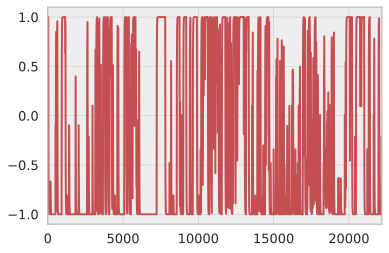

In [368]:
sim_ema.plot(color='r')
plt.show()

In [370]:
values = pd.concat([sim_ema, ema], axis=1)
values.columns = ['sim_ema', 'ema']

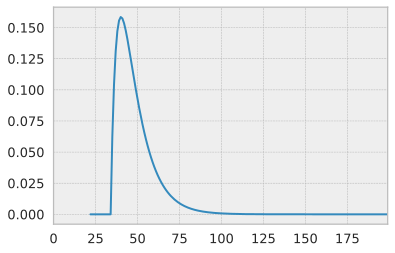

In [371]:

(values.sim_ema - values.ema).head(200).plot()

In [375]:
RW1=np.cumsum(ema-np.mean(ema));
A = 10.0
t_final= len(ema)
delta_t=1 #tick
# The time array of the trajectory
time = np.arange(0, t_final, delta_t)


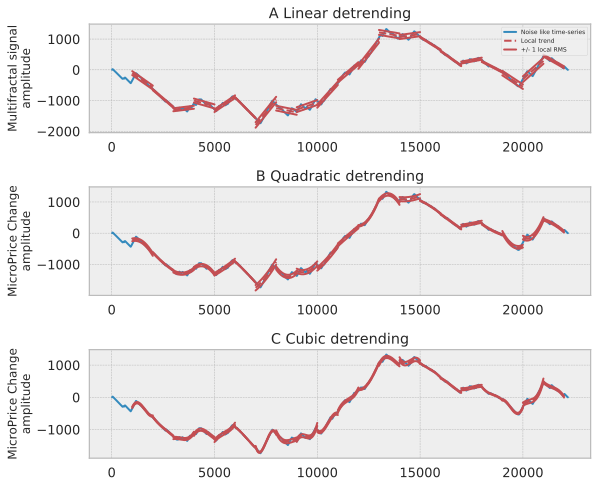

In [382]:
y=ema
scale = 1000
RW = cumsum(y-y.mean())
plt.figure(figsize=(9, 8), dpi= 80, facecolor='w', edgecolor='k')
plt.subplot(311)
plt.title('A Linear detrending')
plot_trends(RW1,scale,1,label='Multifractal signal\namplitude',
            title='A Linear detrending')
plt.legend(['Noise like time-series','Local trend','+/- 1 local RMS'], prop={'size': 6}, loc='upper right')
plt.subplot(312)
plt.title('B Quadratic detrending')
plot_trends(RW1,scale,2,label='MicroPrice Change\namplitude',
            title='B Quadratic detrending')
plt.subplot(313)
plt.title('C Cubic detrending')
plot_trends(RW1,scale,3,label='MicroPrice Change\namplitude',
            title='C Cubic detrending')
plt.subplots_adjust(hspace=0.5)